# Spaceship Titanic

Predecir que pasajeros fueron transportados a la dimensión alternativa.

## 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data.
df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
print(f"Tamaño del dataset\nColumnas: {df.shape[1]}\nFilas: {df.shape[0]}")
print("\nColumnas:", list(df.columns))

# Visualizar el dataframe.
df

Tamaño del dataset
Columnas: 14
Filas: 8693

Columnas: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### Información de las columnas

* **PassengerId** - Un Id único para cada pasajero. Cada Id toma la forma gggg_pp donde gggg indica un grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas en un grupo son a menudo miembros de la familia, pero no siempre.
* **HomePlanet** - El planeta del que partió el pasajero, típicamente su planeta de residencia permanente.
* **CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en cryosleep están confinados a sus cabañas.
* **Cabin** - El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde side puede ser cualquiera P para Puerto o S para Estribor.
* **Destination** - El planeta al que el pasajero se desembarcará.
* **Age** - La edad del pasajero.
* **VIP** - Si el pasajero ha pagado por un servicio VIP especial durante el viaje.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Cantidad que el pasajero ha facturado en cada uno de los Nave espacial Titanicson muchas comodidades de lujo.
* **Name** - El nombre y apellido del pasajero.
* **Transported** - Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

**Transported** es nuestro target, las demas columnas nuestras features.

In [3]:
# Información de las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


- Se observa que hay un total de 8693 pasajeros.
- Se tiene como features 6 datos numéricos (float64), 7 categóricos(object).
- Faltan valores en todas las features.

### 1.1. Limpieza de datos

- Se van a elimnar las columnas que no aportan valor a la predicción.

- Se va a comprobar:
	- Los valores nulos
	- Los valores 0
	- Valores duplicados
	- Outliers

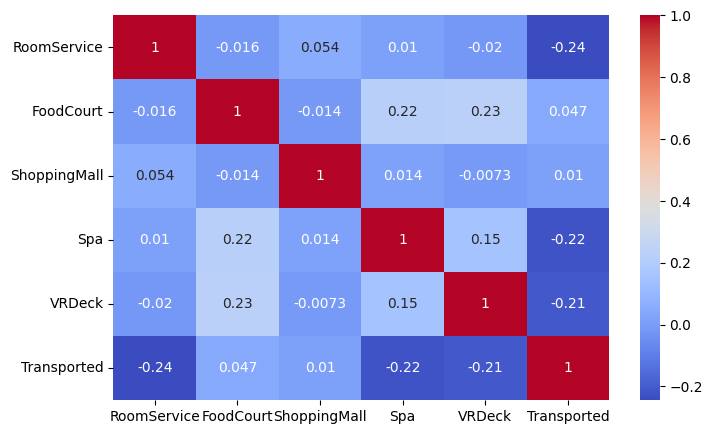

In [4]:
corr_matrix = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
""" Elinar las columnas que no aportan valor. """
def remove_cols(df: pd.DataFrame):
    try:
        df.drop(["PassengerId", "Name"], axis=1, inplace=True)
        print(list(df.columns))        
        # df.drop(["PassengerId", "Name", 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',], axis=1, inplace=True)
    except KeyError:
        print("No existen las columnas indicadas.")

Visualizar valores nulos

Valores nulos
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Porcentaje de valores nulos
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


Text(0.5, 1.0, 'Valores nulos')

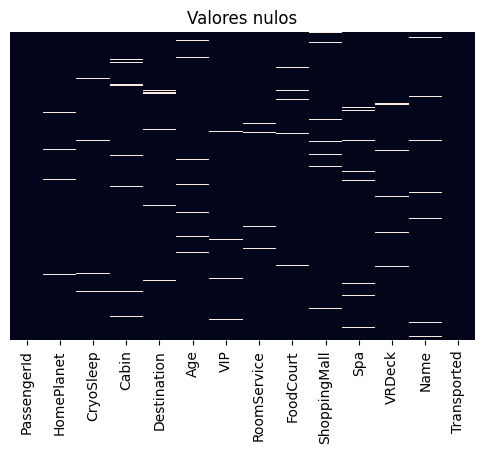

In [6]:
print("Valores nulos\n", df.isnull().sum())
print("\nPorcentaje de valores nulos\n", df.isnull().mean() * 100)

# Gráfico heatmap para una mejor visulización
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Valores nulos")

- Se observa en el gráfico heatmap la existencia de valores nulos en las 11 features.

Antes de hacer las imputaciones de los valores faltantes se va a separar la columna Cabin en 3.

In [7]:
def split_cabin(df: pd.DataFrame):
    try:
        # Dividir Cabin en tres columnas (Deck, Cab_num y Side)
        df[["Deck", "Cab_num", "Side"]]= df["Cabin"].str.split("/", expand=True)
        df.drop("Cabin", axis=1, inplace=True)
        print("\nDividir Cabin.\nColumnas actuales:", list(df.columns))
    except KeyError:
        print("Columna no existe.")

# Mostrar las 3 últimas filas de las nuevas columnas.
# split_cabin(df)
#df[cabin_split].tail(3)

#### Imputar valores nulos

Se utilizo el test de normalidad **D'Agostino-Pearson**, para basar la imputación en la normalidad.
* Un p_value < 0.05, se rechaza la hipotesis de una distribución normal.
* Un p_value < 0.05, indica que los datos podrían seguir una distribución normal.

Entonces si los datos estan distribuidos en forma normal se aplicará la media, en caso contrario será la mediana.

In [8]:
from scipy import stats

# Se realiza la imputación para los valores numéricos.
def handle_null_num(df: pd.DataFrame):
    cols = df.select_dtypes(include="float").columns
    for c in cols:
        stat, p_value = stats.normaltest(df[c].dropna())
        if p_value > 0.05:
            df[c] = df[c].fillna(df[c].mean())
            print(f"{c}, imputado por la media")
        else:
            df[c] = df[c].fillna(df[c].median())
            print(f"{c}, imputado por la mediana")
    print("\nComprobando la imputación:")
    print(df[cols].isnull().sum())

#handle_null_num(df)
#print(df[num_cols].isnull().sum())

In [9]:
# Imputar valores categóricos por la moda.
def handle_null_cat(df: pd.DataFrame):
    split_cabin(df)
    cat_cols = df.select_dtypes(include="object")
    for c in cat_cols:
        df[c] = df[c].fillna(df[c].mode()[0])
    # Comprobar.
    print(df.isnull().sum())

#handle_null_cat(df)
#print(df.isnull().sum())


In [10]:
# Function to clean data
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    remove_cols(df)
    handle_null_num(df)
    handle_null_cat(df)
    return df

df = clean_data(df)
df

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
Age, imputado por la mediana
RoomService, imputado por la mediana
FoodCourt, imputado por la mediana
ShoppingMall, imputado por la mediana
Spa, imputado por la mediana
VRDeck, imputado por la mediana

Comprobando la imputación:
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Dividir Cabin.
Columnas actuales: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck', 'Cab_num', 'Side']
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cab_num         0
Side            0
dtype: int64


/tmp/ipykernel_17/668325609.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].fillna(df[c].mode()[0])


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cab_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


#### Cambiar tipo de datos

In [11]:
df.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Cab_num          object
Side             object
dtype: object

In [12]:
""" Corregir los tipos de datos. """

def fix_types(df: pd.DataFrame):
    # Lista de datos por tipo
    num_cols = df.select_dtypes(include="float").columns
    bin_cols = df.select_dtypes(include="bool").columns
    cat_cols = df.select_dtypes(include="object").columns
    
    cat_cols = cat_cols.drop("Cab_num")

    def change_datatype(cols, dtype):
        for c in cols:
            df[c] = df[c].astype(dtype)

    # Cambiar tipo de datos con la función.
    change_datatype(num_cols, "int")
    change_datatype(bin_cols, "int")
    change_datatype(cat_cols, "category")
    change_datatype(['Cab_num'], "int")
    print(df.dtypes)

fix_types(df)

HomePlanet      category
CryoSleep          int64
Destination     category
Age                int64
VIP                int64
RoomService        int64
FoodCourt          int64
ShoppingMall       int64
Spa                int64
VRDeck             int64
Transported        int64
Deck            category
Cab_num            int64
Side            category
dtype: object


In [13]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cab_num,Side
0,Europa,0,TRAPPIST-1e,39,0,0,0,0,0,0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24,0,109,9,25,549,44,1,F,0,S
2,Europa,0,TRAPPIST-1e,58,1,43,3576,0,6715,49,0,A,0,S
3,Europa,0,TRAPPIST-1e,33,0,0,1283,371,3329,193,0,A,0,S
4,Earth,0,TRAPPIST-1e,16,0,303,70,151,565,2,1,F,1,S


### Análisis Descriptivo

Text(0.5, 1.0, 'Transported')

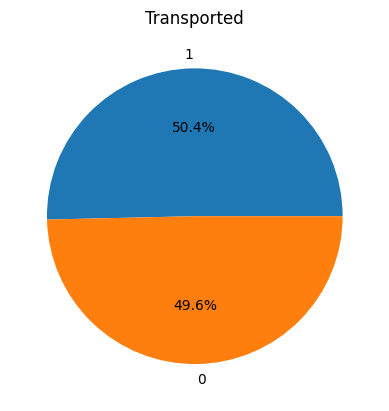

In [14]:
# Gráfico acerca de Transported
ax = plt.subplot()
values = df['Transported'].value_counts()
ax.pie(x=values, labels=values.index, autopct='%1.1f%%')
ax.set_title("Transported")

Descripción de datos numéricos
         CryoSleep          Age          VIP   RoomService     FoodCourt  \
count  8693.000000  8693.000000  8693.000000   8693.000000   8693.000000   
mean      0.349362    28.790291     0.022892    220.009318    448.434027   
std       0.476796    14.341404     0.149568    660.519050   1595.790627   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000    20.000000     0.000000      0.000000      0.000000   
50%       0.000000    27.000000     0.000000      0.000000      0.000000   
75%       1.000000    37.000000     0.000000     41.000000     61.000000   
max       1.000000    79.000000     1.000000  14327.000000  29813.000000   

       ShoppingMall           Spa        VRDeck  Transported      Cab_num  
count   8693.000000   8693.000000   8693.000000  8693.000000  8693.000000  
mean     169.572300    304.588865    298.261820     0.503624   588.501208  
std      598.007164   1125.562559   1134.126417     0.50

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Age'>

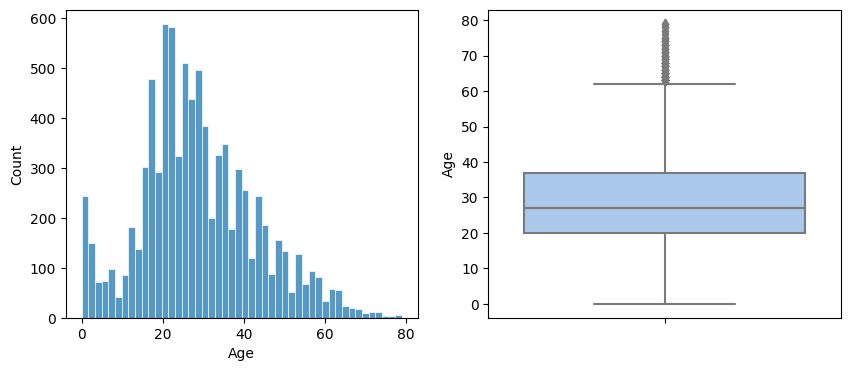

In [15]:
print("Descripción de datos numéricos")
print(df.describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
print(ax)
sns.set_theme(style="ticks", palette="pastel")
sns.histplot(x='Age', data=df, ax=ax[0])
sns.boxplot(y='Age', orient='', data=df, ax=ax[1])

- Se observa que el 50% de las personas comprenden una edad de 20 a 37 años.
- El 75% de los pasajeros tienen una edad inferior a 37 años.
- Los outliers existentes reprentan al pequeño grupo de personas del rango de 60 a 79 años.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

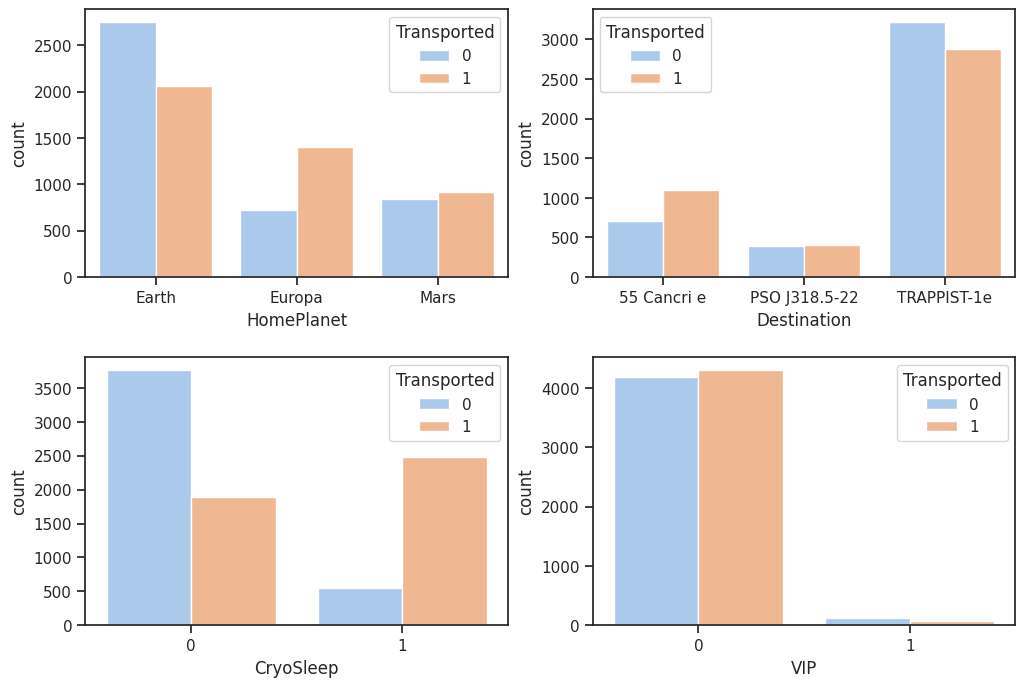

In [16]:
ord_cols = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)
ax = ax.flatten()
for i, col in enumerate(ord_cols):
    sns.countplot(data=df, x=col, hue='Transported', ax=ax[i])

### Transformar datos

Codificar datos categóricos con One Hot Encoder.

In [17]:
def code_data(df: pd.DataFrame) -> pd.DataFrame:
    # one hot encoder to category data
    cat_cols = df.select_dtypes(include="category")
    df_cat = pd.get_dummies(cat_cols, dtype="int")
    df.drop(columns=cat_cols, inplace=True)
    return pd.concat([df, df_cat], axis=1)

Concatenar los dos dataframes, el que contiene las columnas categóricas codificadas y el dataframe de las columnas numéricas.

In [18]:
new_df = code_data(df)
new_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab_num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24,0,109,9,25,549,44,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16,0,303,70,151,565,2,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,1,0,6819,0,1643,74,0,98,...,1,0,0,0,0,0,0,0,1,0
8689,1,18,0,0,0,0,0,0,0,1499,...,0,0,0,0,0,0,1,0,0,1
8690,0,26,0,0,0,1872,1,0,1,1500,...,0,0,0,0,0,0,1,0,0,1
8691,0,32,0,0,1049,0,353,3235,0,608,...,0,0,0,0,1,0,0,0,0,1


In [19]:
# Guardar el dataframe con valores numéricos en un nuevo archivo.
new_df.to_csv("/kaggle/working/clean_data.csv")

## 2. Train Model

In [20]:
# Cargar la data.
data = pd.read_csv("/kaggle/working/clean_data.csv")
data.head()

,Unnamed: 0,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,0,39,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,24,0,109,9,25,549,44,1,...,0,0,0,0,0,1,0,0,0,1
2,2,0,58,1,43,3576,0,6715,49,0,...,1,0,0,0,0,0,0,0,0,1
3,3,0,33,0,0,1283,371,3329,193,0,...,1,0,0,0,0,0,0,0,0,1
4,4,0,16,0,303,70,151,565,2,1,...,0,0,0,0,0,1,0,0,0,1


In [21]:
# Eliminar columna Unnamed: 0
data.drop(columns="Unnamed: 0", axis=1, inplace=True)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab_num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24,0,109,9,25,549,44,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16,0,303,70,151,565,2,1,1,...,0,0,0,0,0,1,0,0,0,1


In [22]:
# Dividir datos por features y targe
X = data.drop(columns="Transported")
y = data["Transported"]

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#print(f"Size x_train: {X_train.shape[0]}\nSize x_test: {X_test.shape[0]}")

rfcls = RandomForestClassifier(random_state=42)

Usamos GridSearchCV para encontrar la mejore cobinación de hiperparámetros.

In [24]:
param_grid = {
    'n_estimators': [30, 50, 70, 90],
    'max_features': ['sqrt'],
    'max_depth'   : [None, 3, 10, 20],
    #'criterion'   : ['gini', 'entropy']
}

grid = GridSearchCV(
        estimator  = rfcls,
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = 1,
        cv         = 5,
        verbose    = 2,
        return_train_score = True
       )

grid.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .max_depth=None, max_features=sqrt, n_estimators=30; total time=   0.3s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=30; total time=   0.3s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=30; total time=   0.3s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=30; total time=   0.3s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=30; total time=   0.3s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=70; total time=   0.6s
[CV] END .max_depth=None, max_features=sqrt, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 3, 10, 20],
                         'max_features': ['sqrt'],
                         'n_estimators': [30, 50, 70, 90]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [25]:
# Top 5 de le media del puntaje de test.
results = pd.DataFrame(grid.cv_results_)
results.filter(regex='(param*|mean_t|std_t)') \
        .drop(columns='params') \
        .sort_values('mean_test_score', ascending=False) \
        .head()

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
11,10,sqrt,90,0.804430,0.001687,0.891183,0.002870
9,10,sqrt,50,0.803572,0.002697,0.890711,0.001186
15,20,sqrt,90,0.803400,0.008666,0.999399,0.000210
8,10,sqrt,30,0.803057,0.004219,0.889552,0.001713
10,10,sqrt,70,0.802885,0.003262,0.890582,0.001523


In [26]:
best_params = grid.best_params_
best_params

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 90}

In [27]:
best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
accuracy

0.7950505402579295

## Predecir datos de test.csv

In [28]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test.shape

(4277, 13)

Se guarda la columna PassengerId, ya que la función clean_data() la elimina.

In [29]:
pass_id = test['PassengerId']

Limpiar los datos del dataframe test.

In [30]:
test_clean = clean_data(test)
fix_types(test_clean)
X_predict = code_data(test_clean)
y_predict = grid.predict(X_predict)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Age, imputado por la mediana
RoomService, imputado por la mediana
FoodCourt, imputado por la mediana
ShoppingMall, imputado por la mediana
Spa, imputado por la mediana
VRDeck, imputado por la mediana

Comprobando la imputación:
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Dividir Cabin.
Columnas actuales: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Cab_num', 'Side']
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Cab_num         0
Side            0
dtype: int64
HomePlanet      category
CryoSleep          int64
Destination     category
Age                int

/tmp/ipykernel_17/668325609.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].fillna(df[c].mode()[0])


In [32]:
sample_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_sub.head()
sample_sub.shape

(4277, 2)

Sustituir columna *Transported* del dataframe de sample_sub por las prediccíones que se realizó.

In [33]:
sample_sub['Transported'] = y_predict.astype(bool)
sample_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [34]:
sample_sub.to_csv('/kaggle/working/submission.csv', index=False)